# **Objective:**
* WAP to evaluate the performance of implemented three-layer neural network with variations in activation functions, size of hidden layer, learning rate, batch size and number of epochs.

# **Description of the Model:**





*   This is a three-layer neural network implemented using TensorFlow (without Keras) for classifying handwritten digits from the MNIST dataset.The model consists of multiple layers and is trained using Mini-batch Gradient Descent with different batch sizes and epoch configurations.

*  It explores the effects of batch size (100, 10, 1) and epochs (100, 50, 10) on model performance.











### **Model Architecture:**

**Input:** Flattened 28×28 images (784 features).

**Hidden Layer :** 256 neurons, ReLU activation.

 **Output Layer:** 10 neurons (digits 0-9), softmax activation.

**Loss Function:** Categorical cross-entropy.

**Optimizer:** Adam.

**Learning rate** = 0.1.

**Different batch sizes:** 50

**Different epochs:** 10

**Metrics:** Train loss, train accuracy, test accuracy, confusion matrix.

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops

# Disable eager execution to use tf.compat.v1.placeholder
tf.compat.v1.disable_eager_execution() # This line disables eager execution

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape input data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)  # Flattening 28x28 images
x_test = x_test.reshape(-1, 784)

# One-hot encoding for labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Reset default graph
ops.reset_default_graph()

# Define placeholders
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

# Define model parameters
def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.1))

W1 = init_weights([784, 256])
b1 = tf.Variable(tf.zeros([256]))

W2 = init_weights([256, 10])
b2 = tf.Variable(tf.zeros([10]))

# Feed-forward pass
def forward_propagation(X):
    z1 = tf.matmul(X, W1) + b1
    a1 = tf.nn.relu(z1)

    z2 = tf.matmul(a1, W2) + b2
    output = tf.nn.softmax(z2)

    return output

y_pred = forward_propagation(X)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=Y))

# Back-propagation using SGD
learning_rate = 0.1
optimizer = tf.compat.v1.train.AdamOptimizer().minimize(loss)

# Accuracy metric
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Training
epochs = 50
batch_size = 10

# Lists to store loss and accuracy
train_losses = []
train_accuracies = []

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_acc = 0
        num_batches = x_train.shape[0] // batch_size

        for i in range(0, x_train.shape[0], batch_size):
            batch_x = x_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y: batch_y})

            epoch_loss += batch_loss
            epoch_acc += batch_acc

        epoch_loss /= num_batches
        epoch_acc /= num_batches

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Evaluate on test set
    test_acc, y_pred_vals = sess.run([accuracy, y_pred], feed_dict={X: x_test, Y: y_test})
    y_pred_labels = np.argmax(y_pred_vals, axis=1)

    print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1, Loss: 1.5441, Accuracy: 0.9231
Epoch 2, Loss: 1.5019, Accuracy: 0.9610
Epoch 3, Loss: 1.4925, Accuracy: 0.9696
Epoch 4, Loss: 1.4864, Accuracy: 0.9754
Epoch 5, Loss: 1.4830, Accuracy: 0.9789
Epoch 6, Loss: 1.4813, Accuracy: 0.9805
Epoch 7, Loss: 1.4793, Accuracy: 0.9823
Epoch 8, Loss: 1.4789, Accuracy: 0.9823
Epoch 9, Loss: 1.4770, Accuracy: 0.9842
Epoch 10, Loss: 1.4768, Accuracy: 0.9846
Epoch 11, Loss: 1.4759, Accuracy: 0.9853
Epoch 12, Loss: 1.4752, Accuracy: 0.9860
Epoch 13, Loss: 1.4743, Accuracy: 0.9870
Epoch 14, Loss: 1.4735, Accuracy: 0.9878
Epoch 15, Loss: 1.4730, Accuracy: 0.9882
Epoch 16, Loss: 1.4726, Accuracy: 0.9886
Epoch 17, Loss: 1.4721, Accuracy: 0.9891
Epoch 18, Loss: 1.4721, Accuracy: 0.9891
Epoch 19, Loss: 1.4717, Accuracy: 0.9894
Epoch 20, Loss: 1.4714, Accuracy: 0.9897
Epoch 21, Loss: 1.4711, Accuracy: 0.9899
Epoch 22, Loss: 1.4705, Accuracy: 0.9906
Epoch 23, Loss: 1.4707, Accuracy: 0.9903
Epoch 24, Loss: 1.4697, Accuracy: 0.9915
Epoch 25, Loss: 1.4703, A

In [19]:
import matplotlib.pyplot as plt

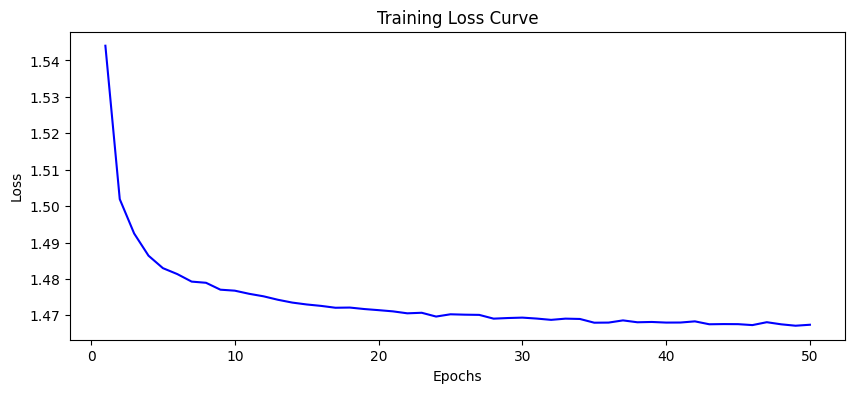

In [20]:
# Plot loss curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, epochs + 1), train_losses, linestyle='-', color='b', label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

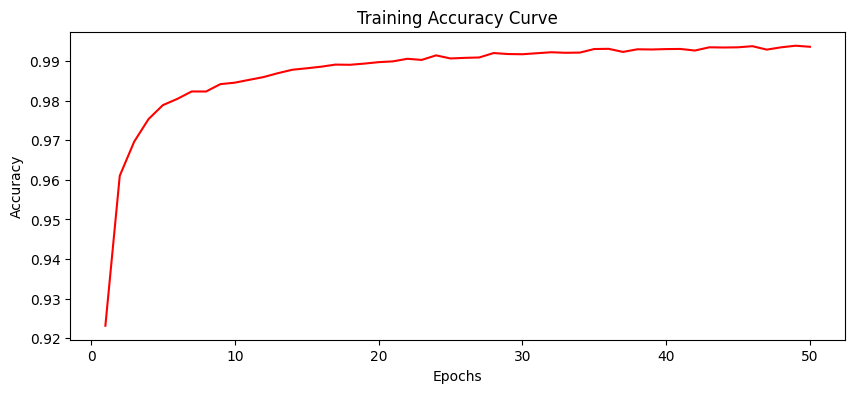

In [21]:
# Plot accuracy curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, epochs + 1), train_accuracies, linestyle='-', color='r', label='Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

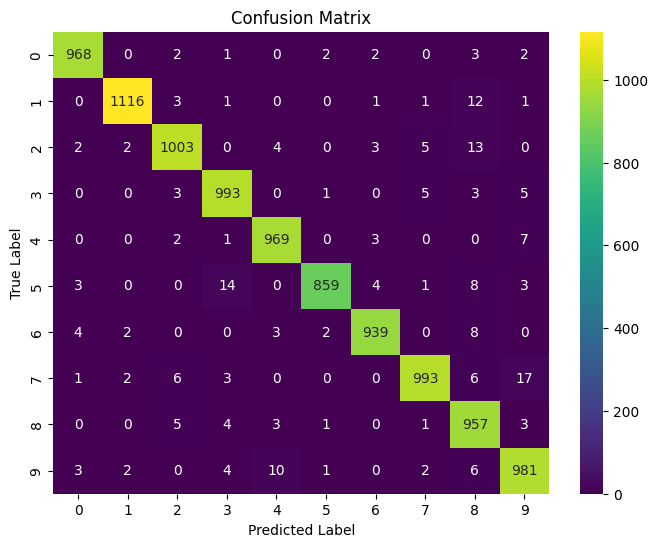

In [29]:

# Convert one-hot encoded labels back to integer labels
y_test_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Description of the Code**  

1. **Import Libraries** → Load TensorFlow, NumPy, Matplotlib, and Seaborn for model building, data handling, and visualization.  

2. **Load and Preprocess Data**  
   - Load the **MNIST dataset** (handwritten digits 0-9).  
   - Normalize pixel values to the range **[0,1]** for better model performance.  
   - Flatten **28×28 images** into **1D vectors of size 784**.  
   - Convert labels into **one-hot encoding** format.  

3. **Define the Neural Network**  
   - Create placeholders for **input (X)** and **output (Y)**.  
   - Initialize weights and biases for a **two-layer feedforward neural network**.  
   - Implement **forward propagation** using **ReLU activation** in the hidden layer and **softmax activation** in the output layer.  

4. **Define Loss, Optimizer, and Accuracy**  
   - Use **categorical cross-entropy loss** to measure prediction errors.  
   - Optimize using the **Adam optimizer** for efficient weight updates.  
   - Calculate **accuracy** based on the correct classification of digits.  

5. **Train the Model**  
   - Run training for **50 epochs** using **mini-batch gradient descent** (batch size = 10).  
   - Store **loss** and **accuracy** at each epoch.  
   - Print training progress after each epoch.  

6. **Evaluate the Model on Test Data**  
   - Compute and display the **final test accuracy**.  
   - Convert predicted values into class labels (0-9).  

7. **Visualize Training Performance**  
   - Plot **training loss** and **accuracy curves** over epochs.  

8. **Analyze Predictions with a Confusion Matrix**  
   - Compute and display a **confusion matrix** to assess misclassifications.  
   - Use **Seaborn heatmap** to visualize the results.  



# **My Comments:**

*   Reducing the learning rate (e.g., 0.01 or 0.001) can help improve accuracy.
*  Increasing the number of hidden layers may improve model accuracy.

*   Using batch size 1 is not needed because it only increases training time without much benefit.
*   Choosing the right batch size and number of epochs can improve model efficiency.

*   Analyzing loss curves and accuracy trends can help fine-tune the training process.
*   Execution time is much lower for larger batch sizes.

*  Training with Batch Size = 1 took more time but did not improve accuracy.




















